In [5]:
import tensorflow as tf
import os
import numpy as np
from os import listdir
from PIL import Image
from sklearn.model_selection import train_test_split
import imageio
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout , BatchNormalization
from keras.optimizers import SGD
from sklearn.model_selection import KFold
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [6]:

imgSize = 224 #resize all images 224*224 pixels
numClasses = 2 #0-> defected, 1->good
testSize = 0.2 #20% testing, 80%training


In [7]:
#get dataset 
dataset_path='D:/Final/Graduation project/datasets/casting_data/casting_data'
l=listdir(dataset_path)
X = []
Y = []
for i , label in enumerate(l):
    print(i,'  ',label)
    datas_path = dataset_path + '/' + label
    for data in listdir(datas_path):
        # print('** ',data)
        img = imageio.v2.imread(datas_path + '/' + data, as_gray=False)
        img = cv2.resize(img, (imgSize,imgSize))
        X.append(img)
        Y.append(label)

0    0
1    1


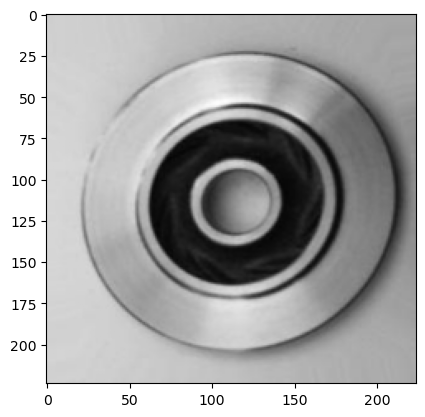

In [8]:
X = np.asarray(X)
X  = X.astype('float32')
X /= 255

#Splitting 20% test , 80% Train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=testSize,shuffle=True)



#test image in train
plt.imshow(x_train[2])

# Reshaping the array to 4-dimensions so that it can work with the Keras API
x_train = x_train.reshape((x_train.shape[0], imgSize, imgSize, 3))
x_test = x_test.reshape((x_test.shape[0], imgSize, imgSize, 3))


y_train = to_categorical(y_train, numClasses)
y_test = to_categorical(y_test, numClasses)

In [9]:
#Build CNN Model vgg-16 Arch.


model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(imgSize, imgSize, 3),padding="same", activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(512, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(512, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(512, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(512, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(512, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(512, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(numClasses, activation="softmax"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# Compile model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

In [10]:

model.fit(x_train, y_train, epochs=2, batch_size=32,verbose=0)
scoreOfTest = model.evaluate(x_test, y_test, batch_size=32, verbose=0)
print(scoreOfTest)


[0.681342601776123, 0.5766828656196594]


In [13]:
model.save('vgg16.model')
recent_model = tf.keras.models.load_model('vgg16.model') 

INFO:tensorflow:Assets written to: vgg16.model\assets


INFO:tensorflow:Assets written to: vgg16.model\assets


In [ ]:
# # k-fold cross-validation during trianing
# scores, histories = list(), list()
# sum_ = 0.0
# # prepare cross validation
# K=3
# kfold = KFold(K, shuffle=True, random_state=1)

# # enumerate splits
# for train_ix, val_ix in kfold.split(x_train):
#     # select rows for train and test
#     trainX, trainY, valX, valY = x_train[train_ix], y_train[train_ix], x_train[val_ix], y_train[val_ix]
#     # fit model
#     history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(valX, valY), verbose=0)
#     # evaluate model
#     _, acc = model.evaluate(valX, valY, verbose=0)
#     # stores scores
#     scores.append(acc)
#     histories.append(history)
#     sum_ += acc
# scoreOfVal = sum_ / K

# #TESTING ACCURACY 
# _, scoreOfTest = model.evaluate(x_test, y_test, batch_size=32, verbose=0)

In [ ]:

# print('Validation Accuracy= ', scoreOfVal)
# print('Testing Accuracy= ', scoreOfTest)

# y_pred = model.predict(x_test)
# # print(y_pred)


# y_pred_=np.argmax(y_pred, axis=1)
# y_test_=np.argmax(y_test, axis=1)
# # print(y_test)


# print(classification_report(y_test_, y_pred_))
# print (confusion_matrix(y_test_, y_pred_))


# # # Precision= TP/(TP + FP) = Accuracy of positive predictions.

# # # Recall = TP/(TP+FN) = Fraction of positives that were correctly identified.

# # # F1 Score = 2*(Recall * Precision) / (Recall + Precision) = What percent of positive predictions were correct? 

In [ ]:
# tf.keras.models.save_model(model, 'model.pbtxt')

# converter = tf.lite.TFLiteConverter.from_keras_model(model = model)

# model_tflite = converter.convert()

# open("demo_project.tflite", "wb").write(model_tflite)
